<img src="./img/HWNI_logo.svg"/>

# Lab 00b - Review of Statistics Fundamentals with Pandas and Seaborn

We'll begin by going over both key notions from probability and some of the most fundamental statistics -- means, medians, and so on. We'll also take this opportunity to practice using the technological tools we'll need for this course. If you're unfamiliar with them, make sure to check out the `Tech Tools Tutorial` folder for brief introductions.

If you've never done any computer programming before, make sure to work through the [Codecademy Python course](https://www.codecademy.com/learn/python) through Lesson 9 as soon as possible. You won't necessarily need it to make it through this lab, but baseline comfort with programming is a key skill for this course and for most of science today.

## What is Statistics?

A *statistic* is a number or collection of numbers that describes a dataset. In the field of statistics, we study the properties of these descriptions: which datasets do they summarize well? when does a difference in a statistic mean the datasets are different? how can I tell whether one statistic or another is a better summary of the data?

Our goal is *understanding* data -- being able to build models that describe it well or being able to predict the behavior of a system well enough to control it (e.g. to fix it when it is broken, as in medicine).

To get our hands on some statistics, we first need a dataset. We'll be working with two. For concreteness' sake, let's say one represents the number of spikes produced by a neuron in response to repeated presentations of some stimulus and the other represents the reaction times of a subject during a memory task.

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

# numpy - linear algebra and matrices for python
import numpy as np

# pandas - "DataFrames" to organize our data
import pandas as pd

# matplotlib - workhorse plotting library
import matplotlib.pyplot as plt

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab00utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

In [56]:
dfSpike = pd.DataFrame.from_csv('./data/spikecounts.csv')
dfTimes = pd.DataFrame.from_csv('./data/reactiontimes.csv')

dfSpike

,counts
0,0
1,0
2,1
3,0
4,2
5,0
6,0
7,2
8,1
9,0


As far as descriptions of a dataset go, a list of every data point is an accurate one, but not a very useful one.

Next, we'll go over how to plot our whole dataset at once, getting a "visual summary" that can give us some intuition for what's going on in our data. Then, we'll go over some descriptive statistics that can numerically summarize our data and methods for visualizing those statistics.

But first, we'll talk a bit about how we organize our data.

# Organizing Data: Numpy Arrays and Pandas Dataframes

In the last lab, we talked about two ways of representing probability mass functions: as lists and as dictionaries. Lists and dictionaries are examples of what are called *data structures*. Data structures help us organize information when working with computer programs. Lists and dictionaries are extremely flexible data structures that can be used for a wide variety of purposes -- even implementing whole programming languages! 

We're interested in a somewhat smaller range of applications: working with data, usually numeric. For this, we turn to two tools that are specialized versions of lists and dictionaries -- less flexible than their forebears but with features we need all ready to go.

### Numpy Arrays

Often, when we have a list of data, it comes as a one, two, or more dimensional box: a vector, a matrix, or a more general *array* of data, where each piece of data is a number. For example, a song might be represented as a vector, an image can be represented as a matrix, and an album of images can be represented as a three-dimensional array (a stack of matrices).

The package `numpy` implements a bunch of useful routines for working with arrays of data. For example, I used numpy to randomly generate the data for this lab. Numpy can also efficiently perform linear algebra operations (like matrix multiplication), Fourier transforms, convolutions, and lots of basic mathematical operations (like trigonometric functions).

This includes basic statistical operations, like computing means, covariances, and such.

### Pandas Dataframes

Numpy arrays would be sufficent for what we'll be doing in this lab, where all we have is a list of data values.
However, in neuroscience we often have to deal with complicated datasets -- a full "data point" from a neuroscience experiment might include several numbers (input stimulus and neural response) along with a host of metadata -- subject ID, brain region, genotype, experiment date, and so on. In principle, it's possible to organize all of this information in a collection of arrays, lists, dictionaries, and so on, but it's easy to make mistakes and hard to keep everything in agreement.

The standard solution to this problem is a data structure called a *dataframe* or a *table*. A dataframe is like a two-dimensional array that isn't restricted to holding only numbers and that uses either numbers or strings as indices. That might remind you of a dictionary, and it should: a dataframe is like a dictionary of arrays that are all the same length.

In Python, the most popular implementation of dataframes is in the `pandas` library. To start getting used to pandas, we'll use it in this lab, even though it isn't strictly necessary. If you'd like to learn more about how to use pandas, check out the tutorial on using pandas in the `Tech Tools Tutorials/` folder.

# Visualizing Data

Now that we understand how our data is organized, let's start visualizing it. Pandas dataframes work well with a statistical visualization package called `seaborn`, on which there's more in the tutorial *Plotting with Seaborn*. That tutorial is meant to serve as a reference for most of the plotting we'll need to do for the first few weeks of the course, so there's no need to work through the entirety of it just now.

You might be familiar with *scatterplots*, which show pairs of data values as points in a two-dimensional plane. The one-dimensional equivalent of a scatterplot is called a *rugplot*, after its passing resemblance to a shag carpet. In a rugplot, we simply place a small tickmark at each number where we observed a data value, as below:

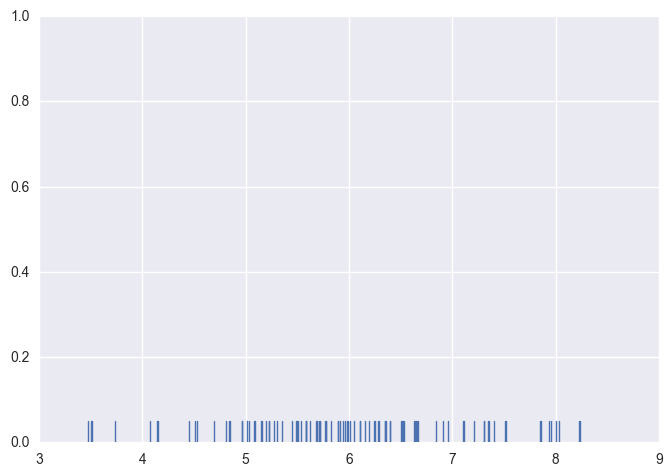

In [28]:
# sns is our alias for seaborn
#  and we call the rugplot function 

sns.rugplot(dfTimes);

This gives us a sense of where the data values fall -- they appear to be clustered somewhat around 5.5 or 6, and to be somewhat evenly distributed on both sides of that value.

Now, use `sns.rugplot` on the spike data:

In [29]:
# your code here

This rugplot is much less informative. Can you explain why? Think back to the distinction between probability mass functions and probability density functions in the first half of the lab. Do you see a connection?

Another commonly-used plot for visualizing data distributions, the *histogram*, is able to handle both kinds of datasets. To make a histogram, we split the data axis into a number of discrete "bins" and count how many data values fall into each bin. Often, we divide the number in each bin by the total number of data points in order to get a ratio.

Such a histogram is a probability density function. What events does it describe the probability of?

In seaborn, the function we use to plot histograms is called `distplot`. It's capable of producing histograms, rugplots, and another visualization called a *kernel density estimate* (KDE) in any combination. For more information on how to use this function, check out the section on *Visualizing Distributions* in the *Plotting with Seaborn* tutorial.

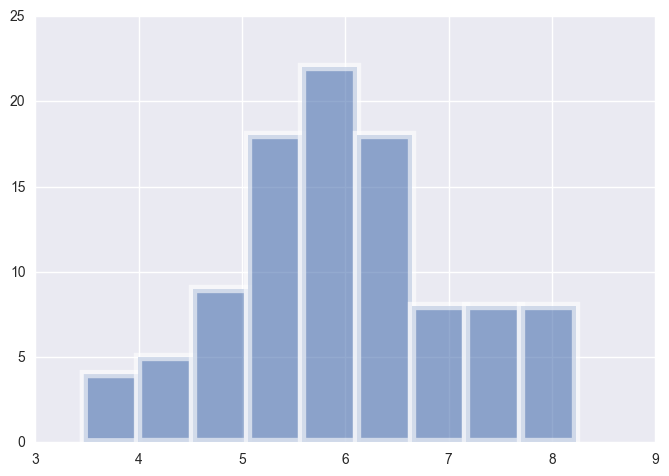

In [30]:
style_parameters = {'linewidth':6,
                   'edgecolor':'white',
                   'alpha':0.6,
                   'normed':False,}

sns.distplot(dfTimes, #which data to use?
             hist=True,kde=False, #plot histogram or kde?
             rug=False, #include a rugplot for reference?
             hist_kws=style_parameters #lots of other parameters
            );

Now, let's apply it to the spikes dataset.

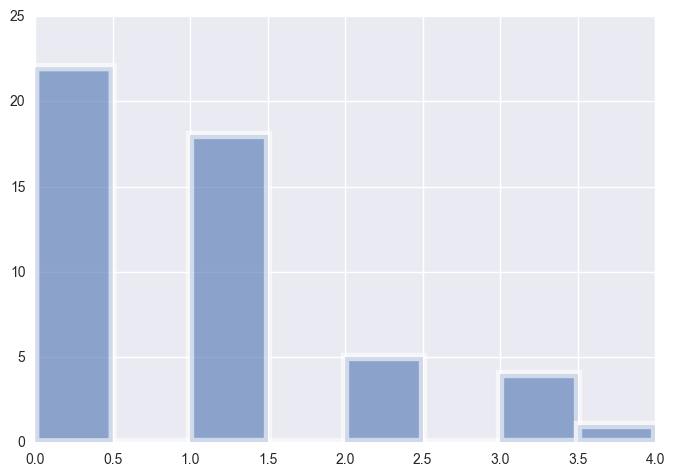

In [31]:
sns.distplot(dfSpike,hist=True,kde=False,
            hist_kws=style_parameters);

This is certainly a much better picture of the data than the rugplot gave, but the bins don't line up nicely with our data. This is because seaborn is has to guess where to put the bins, and finding the right bin size and location is as much art as science.

Adding the `bins` argument to distplot lets you set the location of the bins instead. You can either give a number, and distplot will place that many evenly-sized bins where it thinks is best, or you can give a list of locations for the left edges of the bins. First, play around with different numbers of bins for the reaction times dataset, then, try fixing the histogram for the spikes data so that it represents the data better.

# Descriptive Statistics

Nowadays, thanks to ubiquitous, inexpensive, and easy-to-use computation, building high-quality visualizations of your data is a breeze, and you can iterate over multiple different visualizations (e.g. histograms with different bin sizes) in seconds, and you can share those visualizations instantly with anyone with an internet connection.

Before these happy days, there was more interest in simple descriptions of datasets that could be easily computed, compared against tables, and shared -- where is the "center" of the data? is the data more likely to be above the center or below the center? are there any data points that fall very far away from the others?

These simple descriptions, also known as *statistics*, are still incredibly useful for distilling information out of data. One of the major goals of this course is to learn what these statistics do and do not tell you, what assumptions about your data are necessary to use them, and when they can lead you astray.

## Mean

Perhaps the most commonly-used statistic is the mean, also known as the average value or the expected value. To calculate the mean of a dataset, we simply add up all of the values and divide by the size of the dataset.

Below, implement a function that computes and returns the mean of a dataset using a `for` loop.

In [32]:
def mean(dataset):
    return

It's important not to confuse the math term *expected* with our intuition about what we "expect" from a random event. For example, the "expected outcome" of rolling a die is 3.5, but you should not "expect" to see 3.5 when you roll a die. The [psychological notion of expectation](https://en.wikipedia.org/wiki/Expectation_%28epistemic%29) is closer to the mathematical concept of [mode](https://en.wikipedia.org/wiki/Mode_%28statistics%29).

The mean can also be defined as the point that minimizes the squared error, where the squared error when you guess $a$ and the answer is $b$ is $(a-b)^2$. That is, imagine we're playing a game where you pick a point on the number line and I pick a random point from the dataset. We then calculate the squared error, and you earn more money the smaller that value is. The mean is the value to pick that will maximize your winnings, on average.

If you're not one for games, here's one more way to think of the mean. Recall that we introduced probability mass and density functions by a physical analogy, where probability was analogous to mass. Continuing that analogy, we can understand the mean as the "balancing point" of an object described by a given probability mass or density function -- as indicated in the image below, it's the place where you would put the wedge of a see-saw in order to maintain balance. In physics, this is called the "center of mass".

![expectation](img/expectation.png) Modified image from [Wikipedia](https://en.wikipedia.org/wiki/File:Beta_first_moment.svg).

## Median

The *median* is another statistic used to quantify the "center" of a dataset. The median of a dataset is the value "in the middle" of all of points in a dataset: as many data values are above the median as are below the median. If there is an odd number of points in a dataset, the median is a data point -- $\frac{N-1}{2}$ points are above and below this point. If the number of data points is even, then there is not a unique point that has half of the data above and below it. The dataset splits into two halves, each of size $\frac{N}{2}$, and any point between the maximum of the smaller half and the minimum of the larger half has the same number of points above it as below. We choose the median to be the middle of these two numbers.

Below, define a function that will compute the median of a dataset (you can assume it comes in sorted). Use an `if` statement to handle the two cases of an even and odd number of data points.

In [33]:
# your code here

The median can also be viewed as the winning strategy in a game, just like the mean. Imagine we play the same game, where you pick a point on the number line and I pick a data point at random, but now, we measure the difference between the two points instead of the squared error: $\lvert a - b \rvert$ instead of $(a-b)^2$. The new winning strategy is to pick the median, instead of the mean.

Unfortunately, the point with as much data on one side as the other and the point that wins the game described above don't agree when the data has two or more dimensions. As such, there's not an obvious way to extend the median to multiple dimensions. See the discussion [here](https://en.wikipedia.org/wiki/Median#Multivariate_median) for a few alternatives.

### Means versus Medians

Both the mean and the median claim to measure the "center" of a dataset. So which is better? The answer depends on your data. Specifically, it depends on whether your data is *skewed* or not -- whether values far away from the mean have a tendency to be either big or small, rather than being evenly distributed. For example, incomes are highly skewed upwards, since there are a small number of individuals with incomes orders of magnitude greater than the majority of individuals. On the other hand, heights in all populations are roughly evenly distributed around a central value somewhere between 5 feet, 6 inches and 6 feet, and it is roughly as uncommon to find someone half again as tall (roughly 8 feet) as it is to find someone two-thirds that height (roughly 4 feet)

When we encounter a new dataset, how are we to know whether it is skewed or not? The remainder of our descriptive statistics, and especially our visualization thereof, will help us answer that question.

## Quartiles and Percentiles

We can extend the idea of the median as "the point with half of the data points below it" to points with different fractions of the dataset below them. For example, we can ask which point has one quarter of the data below it, or one eighth, or one one-hundredth. For each fraction, we get a collection of points: a point with one quarter, two quarters, and three quarters of the data below it, for example, or all of the points with one, two, three, four, ... up to ninety-nine one-hundredths of the data below them. These give us a sense for how our data is spread out, in addition to where its center is.

These points partition, or divide up, our data into equally-sized groups: the data points below the first in the collection, between the first and the second, and so on. In the case of quarters and hundredths, these groups have names: *quartiles* and *percentiles*, respectively. They are named in order: the *first quartile* is all of the data points below the first point in the quartering collection, the *37th percentile* is the collection of data points between the 36th and 37th in the collection that divides our data into one hundred equal groups, and so on.

Quartiles are useful for getting a quick sense of how our data is spread out. If the two middle quartiles are the same width, then the data is roughly symmetric -- we have go as far below our middle value as above it in order to cover one quarter of the data points. If one is larger than the other, then our data is more spread out in that direction, since we had to move further in order to cover the same number of data points.

These ideas are easier to grasp visually, so below, we'll visualize some examples of both cases with boxplots.

## Visualizing Descriptive Statistics with Boxplots



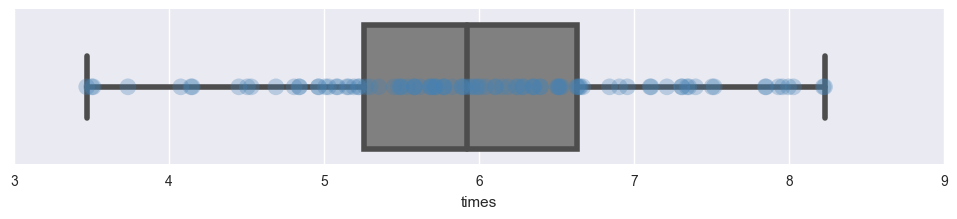

In [40]:
fig = plt.figure(figsize=(12,2))

sns.boxplot(data=dfTimes,x='times',
           linewidth=4,color='grey',);
sns.stripplot(data=dfTimes,
              x='times',size=12,
              color='steelblue', alpha=0.3
              );

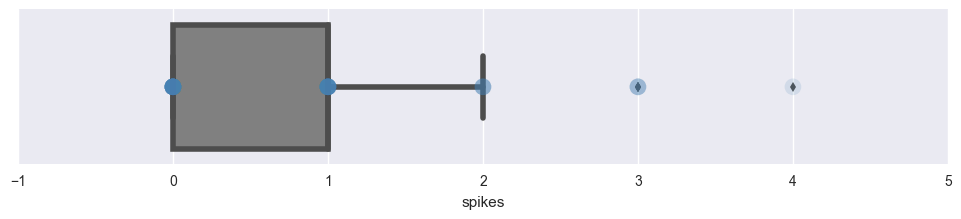

In [37]:
fig = plt.figure(figsize=(12,2))

sns.boxplot(data=dfSpike,x='spikes',
           linewidth=4,color='grey',);

sns.stripplot(data=dfSpike,
              x='spikes',size=12,
              color='steelblue', alpha=0.15
              );